In [5]:
from EnKF_func import *
from AuxFuncs import *
from ML_func import *
from DataGenerator import *

In [6]:
def build_model():
    model = keras.Sequential([
    keras.layers.Dense(20, activation=tf.nn.relu, 
                       input_shape=(train_data.shape[1],)),
    keras.layers.Dense(20, activation=tf.nn.relu),
    keras.layers.Dense(20)
    ])

    #optimizer = tf.train.RMSPropOptimizer(0.001)

    model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae','acc'])
    return model

In [7]:
def PrepareData(X,Y):
    
    data_size = np.shape(X)[0]

    # Shuffle the input
    order = np.argsort(np.random.random(data_size))

    train_size = round(data_size * 0.8)
    test_size = data_size - train_size

    train_data = X[order[0:train_size],:]
    train_labels = Y[order[0:train_size],:]

    test_data = X[order[train_size:],:]
    test_labels = Y[order[train_size:],:]


    # Test data is *not* used when calculating the mean and std.

    mean = train_data.mean(axis=0)
    std = train_data.std(axis=0)
    train_data = (train_data - mean) / std
    test_data = (test_data - mean) / std
    
    return (train_data,train_labels,
            test_data,test_labels)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

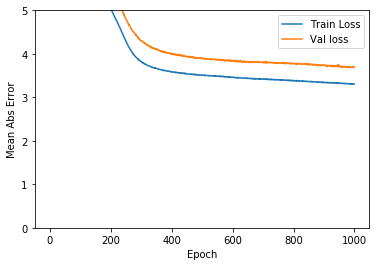

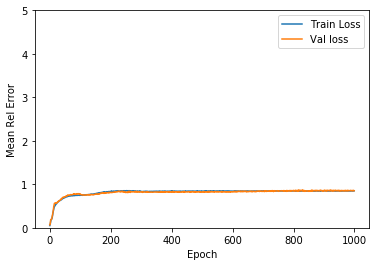

In [9]:
X,Y,Y_noise = DataGen(nobs=2000)

# Experiment with noised data
Y = Y_noise

X = np.transpose(X)
Y = np.transpose(Y)

train_data,train_labels,test_data,test_labels = PrepareData(X,Y)

model1 = build_model()

a,b,c=ML(train_data,train_labels,test_data,test_labels,model=model1,MLDEBUG=True,MLPLOTTING=True)